In [46]:
import pandas as pd
df = pd.read_csv('/content/datos_tratados.csv')

In [47]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   float64
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   float64
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

## 🛠️ Preparación de los Datos##


In [49]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [50]:
#Eliminación de Columnas Irrelevantes
df = df.drop(columns=["customerID"])

In [51]:
df.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [70]:
# para crear uno nuevo
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0.125000,0.484680,0.471144,0.066294,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.125000,0.431755,0.414428,0.060420,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.055556,0.523677,0.553731,0.030239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.180556,0.754875,0.793532,0.140670,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.041667,0.699164,0.653234,0.028687,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.180556,0.401114,0.367164,0.083556,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0.0,0.305556,0.662953,0.665174,0.214043,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0.0,0.027778,0.303621,0.318905,0.008533,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0.0,0.930556,0.512535,0.493532,0.531831,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


## Verificación nuevamente de los valores nulos

In [60]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [61]:
# Verifica valores nulos en las dos columnas
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [62]:
# Elimina filas con valores nulos en las columnas especificadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [63]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


##Normalización/Estandarización

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
columnas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
df_encoded[columnas_numericas] = scaler.fit_transform(df_encoded[columnas_numericas])

# Mostrando los datos normalizados
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0.125000,0.484680,0.471144,0.066294,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.125000,0.431755,0.414428,0.060420,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.055556,0.523677,0.553731,0.030239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.180556,0.754875,0.793532,0.140670,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.041667,0.699164,0.653234,0.028687,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [73]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   float64
 1   customer.tenure                                7043 non-null   float64
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

# Correlación entre las variables

In [74]:
corr = df_encoded.corr()

In [66]:
corr

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
customer.SeniorCitizen,1.000000,0.015683,0.217622,0.219874,0.102411,0.150541,-0.001819,0.016957,-0.210550,0.008392,...,0.059514,-0.060577,0.105445,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
customer.tenure,0.015683,1.000000,0.246210,0.246862,0.825880,-0.354049,0.005285,0.381912,0.163386,0.007877,...,0.361520,0.325288,0.280264,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
Total.Day,0.217622,0.246210,1.000000,0.996227,0.650921,0.192030,-0.014477,0.097159,-0.112514,0.247900,...,0.481736,0.338021,0.626474,0.626058,0.005252,-0.072454,0.349467,0.029974,0.270270,-0.374906
account.Charges.Monthly,0.219874,0.246862,0.996227,1.000000,0.651065,0.192858,-0.013779,0.097825,-0.112343,0.248033,...,0.482607,0.338301,0.629668,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
account.Charges.Total,0.102411,0.825880,0.650921,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,...,0.522881,0.432868,0.515709,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn_Yes,0.150541,-0.354049,0.192030,0.192858,-0.199484,1.000000,-0.008545,-0.149982,-0.163128,0.011691,...,-0.066193,-0.164716,0.063254,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
customer.gender_Male,-0.001819,0.005285,-0.014477,-0.013779,0.000048,-0.008545,1.000000,-0.001379,0.010349,-0.007515,...,-0.000807,-0.008507,-0.007124,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
customer.Partner_Yes,0.016957,0.381912,0.097159,0.097825,0.319072,-0.149982,-0.001379,1.000000,0.452269,0.018397,...,0.153556,0.120206,0.124483,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
customer.Dependents_Yes,-0.210550,0.163386,-0.112514,-0.112343,0.064653,-0.163128,0.010349,0.452269,1.000000,-0.001078,...,0.013900,0.063053,-0.016499,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
phone.PhoneService_Yes,0.008392,0.007877,0.247900,0.248033,0.113008,0.011691,-0.007515,0.018397,-0.001078,1.000000,...,-0.070076,-0.095138,-0.021383,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463


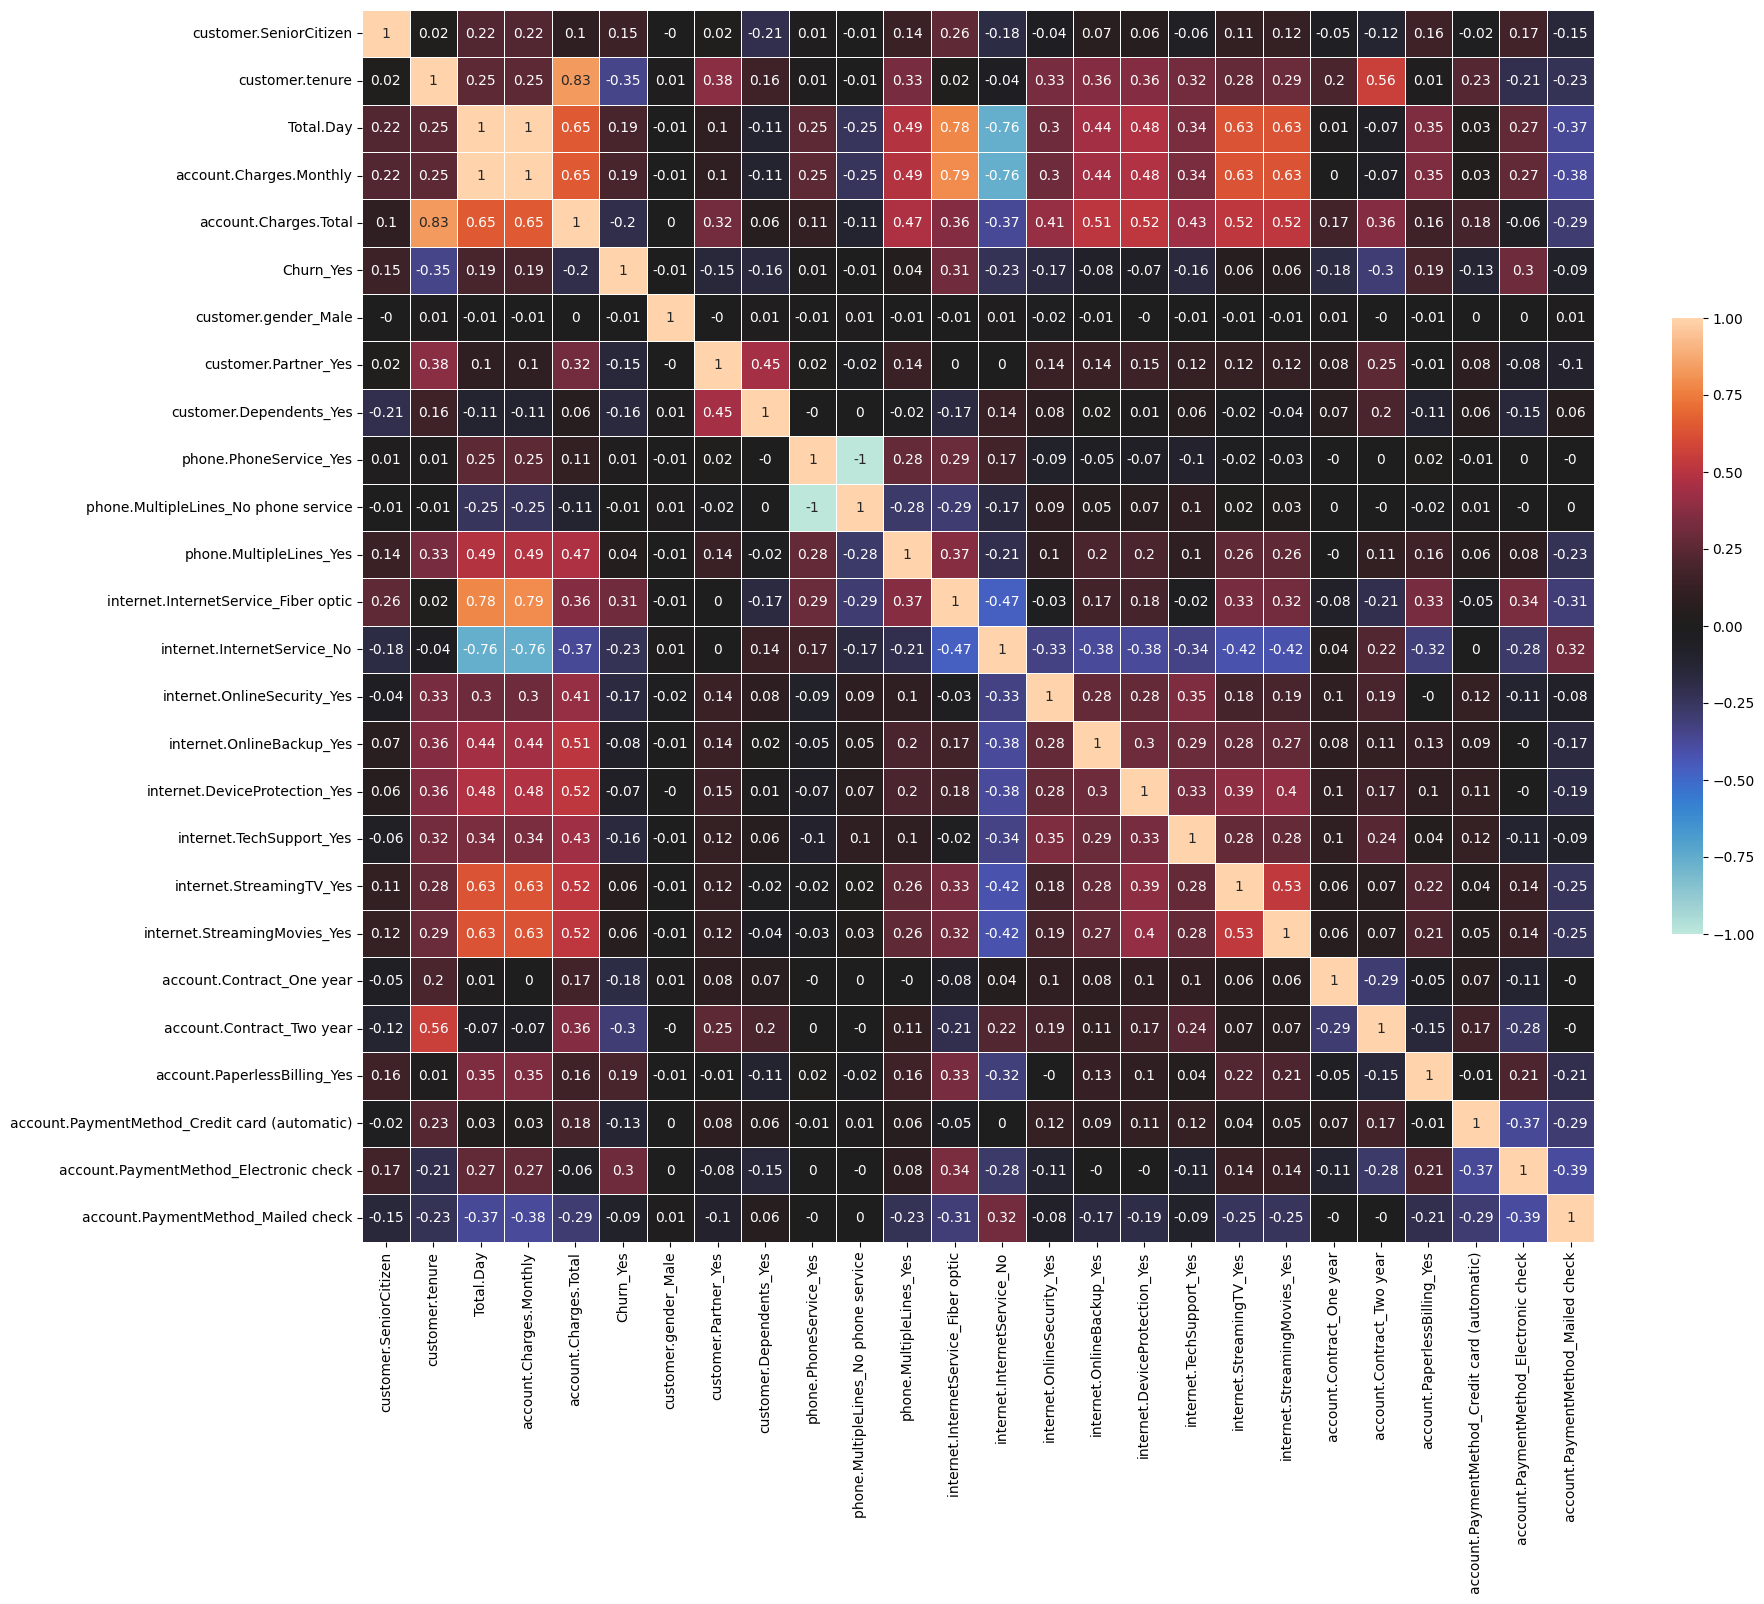

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

In [76]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   float64
 1   customer.tenure                                7043 non-null   float64
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

##  Análisis de Multicolinealidad

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [83]:
#Seleccionar las variables independientes
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

In [86]:
#Añadir constante (intercepto)
X_const = add_constant(X)

# Reemplazar infinitos por NaN
X_const = X_const.replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN
X_const = X_const.dropna()

In [87]:
#Calcular el VIF
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,842.813680
12,internet.InternetService_Fiber optic,148.488697
3,Total.Day,133.784566
13,internet.InternetService_No,104.215059
19,internet.StreamingMovies_Yes,24.155545
18,internet.StreamingTV_Yes,24.076370
5,account.Charges.Total,10.871262
2,customer.tenure,7.612917


In [88]:
df_encoded.drop(columns=["phone.PhoneService_Yes"], inplace=True)


In [ ]:
# Verificar y eliminar columnas:Charges.Monthly, Charges.Total y Total.Day
#df_encoded.drop(columns=["account.Charges.Monthly", "account.Charges.Total", "Total.Day"], inplace=True)


In [89]:
#Mantener solo una de las variables entre InternetService_Fiber optic, InternetService_No
df_encoded.drop(columns=["internet.InternetService_Fiber optic"], inplace=True)

#"phone.MultipleLines_No phone service"

In [90]:
df_encoded.drop(columns=["phone.MultipleLines_No phone service"], inplace=True)
df_encoded.drop(columns=["Total.Day"], inplace=True)

In [ ]:
#Evaluar si es necesario mantener todas las variables derivadas de internet (streaming, seguridad, etc.).
#Verificar si Charges.Total puede ser recalculado, si ya existen Monthly y tenure.

In [92]:
X = df_encoded.drop(columns=['Churn_Yes'])
#Añadir constante (intercepto)
X_const = add_constant(X)

# Reemplazar infinitos por NaN
X_const = X_const.replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN
X_const = X_const.dropna()
#Calcular el VIF
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))


,feature,VIF
0,const,27.197841
4,account.Charges.Total,10.805164
3,account.Charges.Monthly,7.905479
2,customer.tenure,7.576337
9,internet.InternetService_No,3.352248
17,account.Contract_Two year,2.643521
20,account.PaymentMethod_Electronic check,1.968983
14,internet.StreamingTV_Yes,1.859108
21,account.PaymentMethod_Mailed check,1.855452
15,internet.StreamingMovies_Yes,1.849434


In [93]:
df_encoded.drop(columns=["account.Charges.Total"], inplace=True)

In [94]:
X = df_encoded.drop(columns=['Churn_Yes'])
#Añadir constante (intercepto)
X_const = add_constant(X)

# Reemplazar infinitos por NaN
X_const = X_const.replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN
X_const = X_const.dropna()
#Calcular el VIF
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))


,feature,VIF
0,const,20.619637
3,account.Charges.Monthly,5.764526
8,internet.InternetService_No,3.300316
2,customer.tenure,2.766086
16,account.Contract_Two year,2.605101
19,account.PaymentMethod_Electronic check,1.967097
13,internet.StreamingTV_Yes,1.852376
14,internet.StreamingMovies_Yes,1.842130
20,account.PaymentMethod_Mailed check,1.839642
15,account.Contract_One year,1.615384


##  Modelos Predictivos

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [96]:
# Separar features y target
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

In [97]:
#Dividir entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Normalizar**

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear entrenamiento con SMOTE**

In [99]:
# Balancear con SMOTE (solo en train)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [100]:
print("Distribución antes de SMOTE:", y_train.value_counts().to_dict())
print("Distribución después de SMOTE:", {0: sum(y_train_bal==0), 1: sum(y_train_bal==1)})


Distribución antes de SMOTE: {0.0: 3622, 1.0: 1308}
Distribución después de SMOTE: {0: 3622, 1: 3622}



Matriz de confusión:
 [[1140  412]
 [ 125  436]]

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.90      0.73      0.81      1552
         1.0       0.51      0.78      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.75      0.76      2113

ROC AUC: 0.8345754773324513


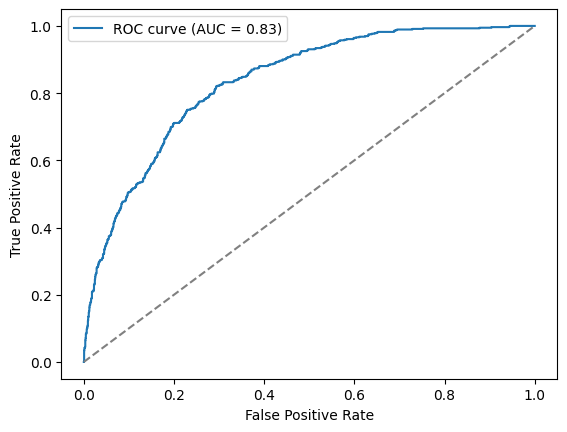

In [102]:
 #Entrenar el modelo
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

# Evaluar en test (sin SMOTE)
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:,1]

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_proba))
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



# Conclusion

Clase 0 (mayoritaria antes de SMOTE):

Verdaderos negativos (TN): 1140

Falsos positivos (FP): 412

Clase 1 (minoritaria antes de SMOTE):

Falsos negativos (FN): 125

Verdaderos positivos (TP): 436

**Interpretación:**

Clase 0 (negativa):

Alta precisión (90%): de las predicciones como 0, la mayoría son correctas.

Recall algo bajo (73%): se escapan bastantes ejemplos reales de clase 0.

Clase 1 (positiva):

Baja precisión (51%): muchas predicciones positivas son falsas.

Buen recall (78%): el modelo detecta correctamente la mayoría de los positivos reales.

Accuracy y Promedios

Accuracy: 75%

No es una mala cifra, pero no dice todo en casos con clases desbalanceadas originalmente.

Macro promedio (igual peso a ambas clases):

F1: 0.71

Muestra un desempeño bastante balanceado entre clases.

Weighted promedio (ponderado por el número de ejemplos):

F1: 0.76

Algo más alto porque hay más clase 0 que clase 1.

📈 4. ROC AUC: 0.8346

Este valor es bastante bueno. Significa que el modelo tiene una buena capacidad de distinguir entre clases (probabilidad de rankear correctamente una instancia positiva por encima de una negativa).

Análisis global

Pros:

Buen desempeño general del modelo.

SMOTE ayudó a mejorar el recall de la clase minoritaria (1).

El ROC AUC muestra buena discriminación.

Contras:

La precisión de la clase 1 es baja (51%): muchas predicciones positivas son errores.

Hay un trade-off entre recall y precisión. Estás recuperando más positivos, pero con más ruido.

# Modelo SMOTEENN


Matriz de confusión:
 [[995 557]
 [ 78 483]]

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.93      0.64      0.76      1552
         1.0       0.46      0.86      0.60       561

    accuracy                           0.70      2113
   macro avg       0.70      0.75      0.68      2113
weighted avg       0.80      0.70      0.72      2113

ROC AUC: 0.8348224130326919


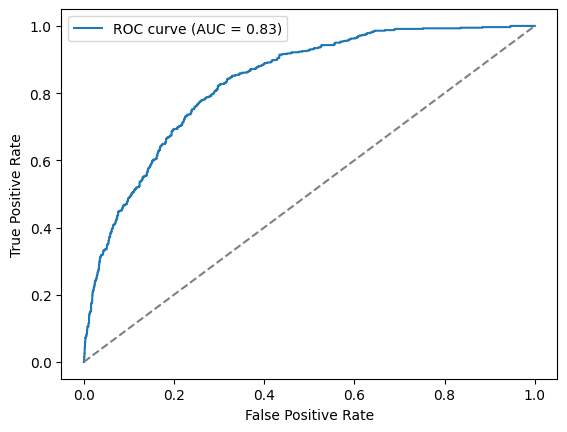

In [103]:
from imblearn.combine import SMOTEENN


# División de datos y escalado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote_enn.fit_resample(X_train_scaled, y_train)

# Entrenar modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

# Evaluar en test
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Reportes
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_proba))
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# Modelo SMOTE omek


Matriz de confusión:
 [[1138  414]
 [ 123  438]]

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.90      0.73      0.81      1552
         1.0       0.51      0.78      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.75      0.76      2113

ROC AUC: 0.8344973767388867


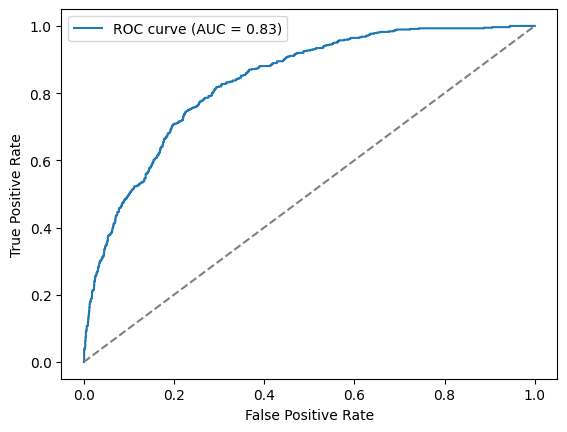

In [104]:
from imblearn.combine import SMOTETomek

# División de datos y escalado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train_scaled, y_train)

# Entrenar modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

# Evaluar en test
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Reportes
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_proba))
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# Modelo RandomForest

In [105]:
from sklearn.ensemble import RandomForestClassifier

# División y escalado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Evaluación
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Resultados
print("\n[Random Forest con SMOTE]")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))



[Random Forest con SMOTE]
[[1303  249]
 [ 258  303]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      1552
         1.0       0.55      0.54      0.54       561

    accuracy                           0.76      2113
   macro avg       0.69      0.69      0.69      2113
weighted avg       0.76      0.76      0.76      2113

ROC AUC: 0.8111372594961133


In [106]:
from imblearn.combine import SMOTEENN

# SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote_enn.fit_resample(X_train_scaled, y_train)

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Evaluación
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Resultados
print("\n[Random Forest con SMOTEENN]")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))



[Random Forest con SMOTEENN]
[[1096  456]
 [ 118  443]]
              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79      1552
         1.0       0.49      0.79      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.79      0.73      0.74      2113

ROC AUC: 0.8252292482128747


In [107]:
from imblearn.combine import SMOTETomek

# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train_scaled, y_train)

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Evaluación
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Resultados
print("\n[Random Forest con SMOTETomek]")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))



[Random Forest con SMOTETomek]
[[1303  249]
 [ 251  310]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1552
         1.0       0.55      0.55      0.55       561

    accuracy                           0.76      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.76      0.76      0.76      2113

ROC AUC: 0.8092714592866199


In [109]:
# Entrenar
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# --- Evaluar en entrenamiento ---
y_train_pred = rf.predict(X_train_bal)
y_train_proba = rf.predict_proba(X_train_bal)[:, 1]

print("\n[Random Forest con SMOTETomek]")
print("\n--- ENTRENAMIENTO ---")
print(confusion_matrix(y_train_bal, y_train_pred))
print(classification_report(y_train_bal, y_train_pred))
print("ROC AUC (Train):", roc_auc_score(y_train_bal, y_train_proba))

# --- Evaluar en test ---
y_test_pred = rf.predict(X_test_scaled)
y_test_proba = rf.predict_proba(X_test_scaled)[:, 1]

print("\n--- TEST ---")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("ROC AUC (Test):", roc_auc_score(y_test, y_test_proba))



[Random Forest con SMOTETomek]

--- ENTRENAMIENTO ---
[[3427    9]
 [   3 3433]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3436
         1.0       1.00      1.00      1.00      3436

    accuracy                           1.00      6872
   macro avg       1.00      1.00      1.00      6872
weighted avg       1.00      1.00      1.00      6872

ROC AUC (Train): 0.9999689143642403

--- TEST ---
[[1303  249]
 [ 251  310]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1552
         1.0       0.55      0.55      0.55       561

    accuracy                           0.76      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.76      0.76      0.76      2113

ROC AUC (Test): 0.8092714592866199


In [110]:
# Funcion generica para evaluacion de modelos.

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, nombre_modelo="", entrenar=True, imprimir=True):
    """
    Evalúa un modelo en conjuntos de entrenamiento y test, y devuelve métricas clave.

    Args:
        modelo: modelo de sklearn ya instanciado.
        X_train, y_train: datos de entrenamiento (ya balanceados si aplica).
        X_test, y_test: datos de prueba (no balanceados).
        nombre_modelo: string para mostrar en los prints.
        entrenar: si True, se ajusta el modelo con los datos de entrenamiento.
        imprimir: si True, imprime los resultados en consola.

    Returns:
        dict con métricas de entrenamiento y test.
    """

    if entrenar:
        modelo.fit(X_train, y_train)

    # --- Predicciones ---
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    y_train_proba = modelo.predict_proba(X_train)[:, 1]
    y_test_proba = modelo.predict_proba(X_test)[:, 1]

    # --- Métricas ---
    resultados = {
        "modelo": nombre_modelo,

        "train_accuracy": accuracy_score(y_train, y_train_pred),
        "train_precision": precision_score(y_train, y_train_pred),
        "train_recall": recall_score(y_train, y_train_pred),
        "train_f1": f1_score(y_train, y_train_pred),
        "train_auc": roc_auc_score(y_train, y_train_proba),
        "train_confusion": confusion_matrix(y_train, y_train_pred),

        "test_accuracy": accuracy_score(y_test, y_test_pred),
        "test_precision": precision_score(y_test, y_test_pred),
        "test_recall": recall_score(y_test, y_test_pred),
        "test_f1": f1_score(y_test, y_test_pred),
        "test_auc": roc_auc_score(y_test, y_test_proba),
        "test_confusion": confusion_matrix(y_test, y_test_pred),
    }

    if imprimir:
        print(f"\n🔍 Modelo: {nombre_modelo}")
        print("\n--- ENTRENAMIENTO ---")
        print("Confusion Matrix:\n", resultados["train_confusion"])
        print(f"Accuracy: {resultados['train_accuracy']:.4f}")
        print(f"Precision: {resultados['train_precision']:.4f}")
        print(f"Recall: {resultados['train_recall']:.4f}")
        print(f"F1-score: {resultados['train_f1']:.4f}")
        print(f"ROC AUC: {resultados['train_auc']:.4f}")

        print("\n--- TEST ---")
        print("Confusion Matrix:\n", resultados["test_confusion"])
        print(f"Accuracy: {resultados['test_accuracy']:.4f}")
        print(f"Precision: {resultados['test_precision']:.4f}")
        print(f"Recall: {resultados['test_recall']:.4f}")
        print(f"F1-score: {resultados['test_f1']:.4f}")
        print(f"ROC AUC: {resultados['test_auc']:.4f}")

    return resultados


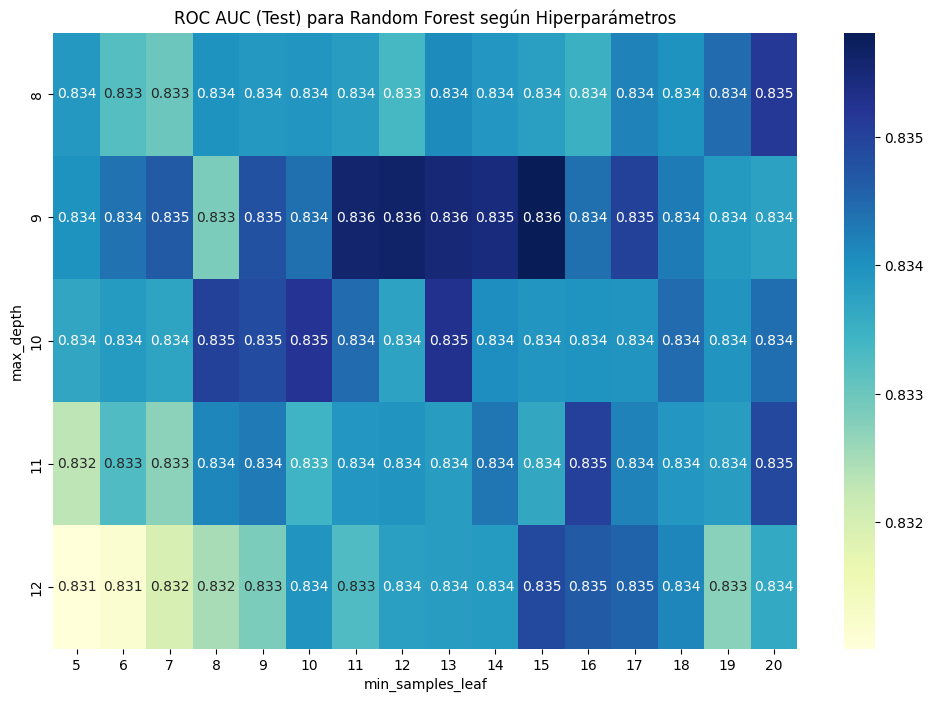

In [112]:
# Generar todas las combinaciones de hiperparámetros

from itertools import product

depth_range = range(8, 13)  # 8 to 12 inclusive
leaf_range = range(5, 21)   # 5 to 20 inclusive

combinaciones = list(product(depth_range, leaf_range))

# Entrenar y evaluar cada combinación

resultados_grid = []


for max_depth, min_samples_leaf in combinaciones:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    resultados = evaluar_modelo(
        rf,
        X_train_bal, y_train_bal,
        X_test_scaled, y_test,
        nombre_modelo=f"RF_depth{max_depth}_leaf{min_samples_leaf}",
        entrenar=True,
        imprimir=False  # evitamos imprimir en cada iteración
    )

    resultados["max_depth"] = max_depth
    resultados["min_samples_leaf"] = min_samples_leaf
    resultados_grid.append(resultados)

# Convertir a DataFrame para análisis

df_resultados = pd.DataFrame(resultados_grid)

# Visualizar los resultados con un heatmap

pivot_auc = df_resultados.pivot(index="max_depth", columns="min_samples_leaf", values="test_auc")


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_auc, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("ROC AUC (Test) para Random Forest según Hiperparámetros")
plt.xlabel("min_samples_leaf")
plt.ylabel("max_depth")
plt.show()




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from itertools import product

def buscar_mejor_modelo_rf(X_train_bal, y_train_bal, X_test_scaled, y_test,
                           max_depth_range=range(8, 13),
                           min_samples_leaf_range=range(5, 21),
                           criterio='test_auc',  # puede ser 'test_f1', 'test_recall', etc.
                           mostrar_heatmap=True):
    """
    Itera sobre combinaciones de hiperparámetros y encuentra el mejor modelo según una métrica.

    Returns:
        df_resultados: DataFrame con todas las métricas.
        mejor_resultado: dict con hiperparámetros y métricas del mejor modelo.
    """

    combinaciones = list(product(max_depth_range, min_samples_leaf_range))
    resultados = []

    for max_depth, min_samples_leaf in combinaciones:
        modelo = RandomForestClassifier(
            n_estimators=100,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        resultado = evaluar_modelo(
            modelo,
            X_train_bal, y_train_bal,
            X_test_scaled, y_test,
            nombre_modelo=f"RF_depth{max_depth}_leaf{min_samples_leaf}",
            entrenar=True,
            imprimir=False
        )

        resultado["max_depth"] = max_depth
        resultado["min_samples_leaf"] = min_samples_leaf
        resultados.append(resultado)

    df_resultados = pd.DataFrame(resultados)

    # Encontrar el mejor modelo según el criterio elegido
    mejor_idx = df_resultados[criterio].idxmax()
    mejor_resultado = df_resultados.loc[mejor_idx].to_dict()

    # Mostrar heatmap si se desea
    if mostrar_heatmap:
        pivot = df_resultados.pivot(
            index="max_depth",
            columns="min_samples_leaf",
            values=criterio
        )
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
        plt.title(f"Mapa de calor: {criterio} según hiperparámetros")
        plt.xlabel("min_samples_leaf")
        plt.ylabel("max_depth")
        plt.tight_layout()
        plt.show()

    print(f"\n✅ Mejor modelo encontrado (según {criterio}):")
    print(f"  - max_depth: {mejor_resultado['max_depth']}")
    print(f"  - min_samples_leaf: {mejor_resultado['min_samples_leaf']}")
    print(f"  - {criterio}: {mejor_resultado[criterio]:.4f}")

    return df_resultados, mejor_resultado


In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from itertools import product
from sklearn.preprocessing import MinMaxScaler

def buscar_mejor_modelo_rf_auto(X_train_bal, y_train_bal, X_test_scaled, y_test,
                                max_depth_range=range(8, 13),
                                min_samples_leaf_range=range(5, 21),
                                mostrar_heatmap=True):
    """
    Busca el mejor modelo RandomForest según múltiples métricas, sin intervención del usuario.

    Devuelve:
        - df_resultados: DataFrame con todas las métricas y rankings
        - mejor_resultado: dict con hiperparámetros y métricas del mejor modelo
    """

    combinaciones = list(product(max_depth_range, min_samples_leaf_range))
    resultados = []

    for max_depth, min_samples_leaf in combinaciones:
        modelo = RandomForestClassifier(
            n_estimators=100,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        resultado = evaluar_modelo(
            modelo,
            X_train_bal, y_train_bal,
            X_test_scaled, y_test,
            nombre_modelo=f"RF_depth{max_depth}_leaf{min_samples_leaf}",
            entrenar=True,
            imprimir=False
        )

        resultado["max_depth"] = max_depth
        resultado["min_samples_leaf"] = min_samples_leaf
        resultados.append(resultado)

    df = pd.DataFrame(resultados)

    # --- Normalizar las métricas que queremos considerar ---
    metricas_clave = ["test_auc", "test_f1", "test_recall", "test_precision", "test_accuracy"]
    scaler = MinMaxScaler()
    df_norm = pd.DataFrame(scaler.fit_transform(df[metricas_clave]), columns=metricas_clave)

    # --- Calcular ranking promedio ---
    df["ranking_promedio"] = df_norm.mean(axis=1)

    # --- Identificar mejor modelo ---
    mejor_idx = df["ranking_promedio"].idxmax()
    mejor_modelo = df.loc[mejor_idx].to_dict()

    # --- Visualización: heatmap de la métrica dominante ---
    if mostrar_heatmap:
        metrica_dominante = df_norm.mean().idxmax()
        pivot = df.pivot(index="max_depth", columns="min_samples_leaf", values=metrica_dominante)

        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
        plt.title(f"Heatmap: {metrica_dominante.upper()} (Test)")
        plt.xlabel("min_samples_leaf")
        plt.ylabel("max_depth")
        plt.tight_layout()
        plt.show()

    # --- Reporte final ---
    print(f"\n✅ Mejor modelo (según ranking combinado de métricas):")
    print(f"  - max_depth: {mejor_modelo['max_depth']}")
    print(f"  - min_samples_leaf: {mejor_modelo['min_samples_leaf']}")
    print(f"  - Ranking Promedio: {mejor_modelo['ranking_promedio']:.4f}")
    for m in metricas_clave:
        print(f"  - {m}: {mejor_modelo[m]:.4f}")

    return df, mejor_modelo


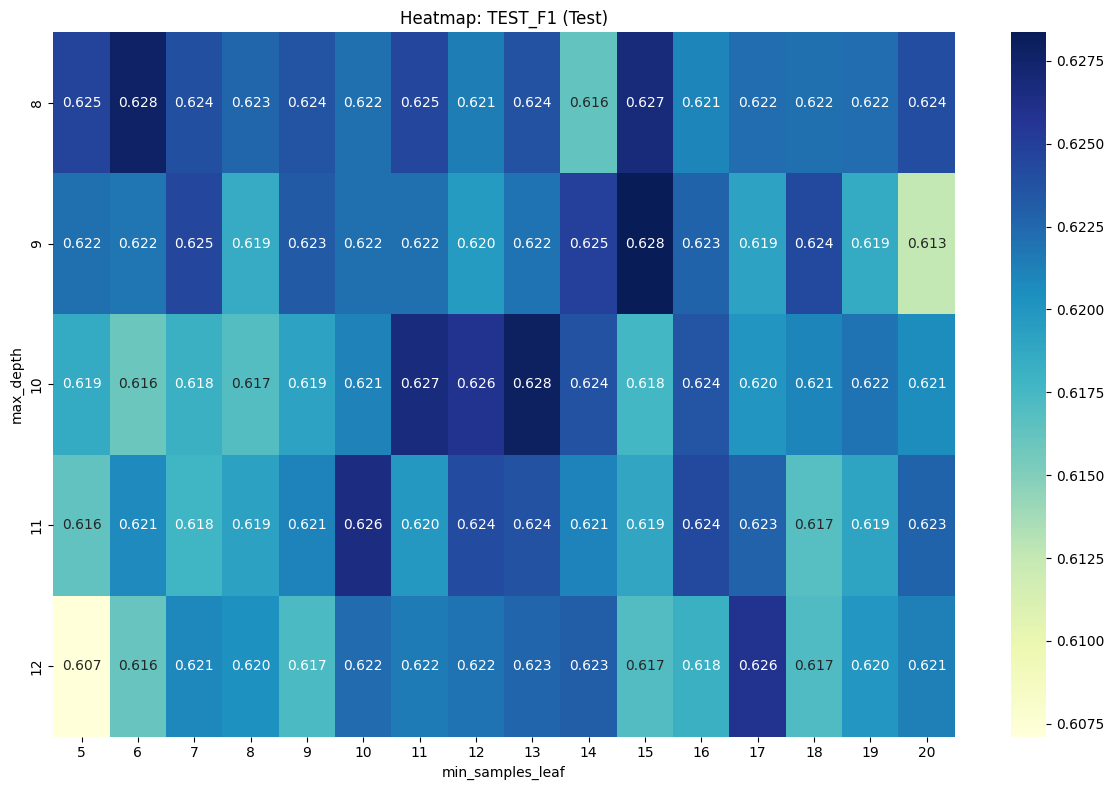


✅ Mejor modelo (según ranking combinado de métricas):
  - max_depth: 10
  - min_samples_leaf: 13
  - Ranking Promedio: 0.8075
  - test_auc: 0.8353
  - test_f1: 0.6279
  - test_recall: 0.7415
  - test_precision: 0.5445
  - test_accuracy: 0.7667


In [115]:
df_rf_auto, mejor_rf_auto = buscar_mejor_modelo_rf_auto(
    X_train_bal, y_train_bal, X_test_scaled, y_test
)


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

def buscar_mejor_modelo_con_balanceo_RF(X, y,
                                        max_depth_range=range(8, 13),
                                        min_samples_leaf_range=range(5, 21),
                                        mostrar_heatmap=True):
    """
    Evalúa Random Forest con distintas técnicas de balanceo y devuelve el mejor modelo global.

    Returns:
        - mejor_modelo_global (dict)
        - mejores_por_tecnica (dict)
    """
    from collections import defaultdict

    tecnicas_balanceo = {
        "SMOTE": SMOTE(random_state=42),
        "SMOTEENN": SMOTEENN(random_state=42),
        "SMOTETomek": SMOTETomek(random_state=42)
    }

    mejores_por_tecnica = {}
    resultados_detallados = {}

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Escalar
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for nombre_tecnica, balanceador in tecnicas_balanceo.items():
        # Aplicar técnica de balanceo
        X_train_bal, y_train_bal = balanceador.fit_resample(X_train_scaled, y_train)

        # Buscar mejor modelo para esta técnica
        df_resultados, mejor_modelo = buscar_mejor_modelo_rf_auto(
            X_train_bal, y_train_bal,
            X_test_scaled, y_test,
            max_depth_range=max_depth_range,
            min_samples_leaf_range=min_samples_leaf_range,
            mostrar_heatmap=mostrar_heatmap
        )

        # Armar estructura
        resumen = {
            "modelo": "RandomForest",
            "tecnica_balanceo": nombre_tecnica,
            "hiperparametros": {
                "max_depth": int(mejor_modelo["max_depth"]),
                "min_samples_leaf": int(mejor_modelo["min_samples_leaf"])
            },
            "metricas": {k: float(mejor_modelo[k]) for k in mejor_modelo if k.startswith("test_")}
        }

        mejores_por_tecnica[nombre_tecnica] = resumen

    # Elegir el mejor entre los 3
    mejor_modelo_global = max(mejores_por_tecnica.values(), key=lambda m: m["metricas"]["test_auc"])

    print("\n🔍 Mejor modelo Random Forest (global):")
    print(f"  - Técnica: {mejor_modelo_global['tecnica_balanceo']}")
    print(f"  - Hiperparámetros: {mejor_modelo_global['hiperparametros']}")
    print(f"  - ROC AUC: {mejor_modelo_global['metricas']['test_auc']:.4f}")

    return mejor_modelo_global, mejores_por_tecnica


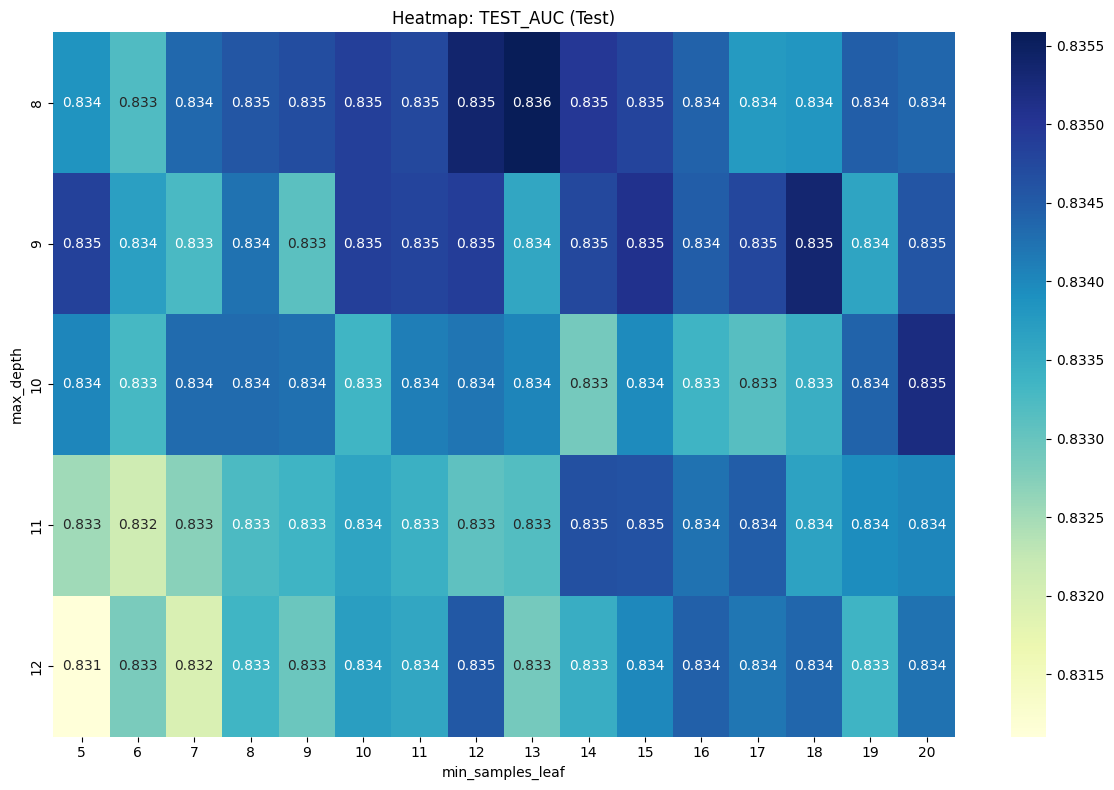


✅ Mejor modelo (según ranking combinado de métricas):
  - max_depth: 12
  - min_samples_leaf: 11
  - Ranking Promedio: 0.7741
  - test_auc: 0.8336
  - test_f1: 0.6274
  - test_recall: 0.7219
  - test_precision: 0.5548
  - test_accuracy: 0.7724


TypeError: only length-1 arrays can be converted to Python scalars

In [117]:
mejor_rf, resumen_rf = buscar_mejor_modelo_con_balanceo_RF(X, y)


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, f1_score, recall_score, precision_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from itertools import product
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, entrenar=True):
    if entrenar:
        modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    return {
        "test_auc": roc_auc_score(y_test, y_proba),
        "test_f1": f1_score(y_test, y_pred),
        "test_recall": recall_score(y_test, y_pred),
        "test_precision": precision_score(y_test, y_pred),
        "test_accuracy": accuracy_score(y_test, y_pred)
    }

def buscar_mejor_modelo_rf_auto(X_train_bal, y_train_bal, X_test_scaled, y_test,
                                max_depth_range=range(8, 13),
                                min_samples_leaf_range=range(5, 21),
                                mostrar_heatmap=True):
    resultados = []
    for max_depth, min_samples_leaf in product(max_depth_range, min_samples_leaf_range):
        modelo = RandomForestClassifier(
            n_estimators=100,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
        resultado = evaluar_modelo(modelo, X_train_bal, y_train_bal, X_test_scaled, y_test)
        resultado["max_depth"] = max_depth
        resultado["min_samples_leaf"] = min_samples_leaf
        resultados.append(resultado)

    df = pd.DataFrame(resultados)
    metricas = ["test_auc", "test_f1", "test_recall", "test_precision", "test_accuracy"]
    df_norm = (df[metricas] - df[metricas].min()) / (df[metricas].max() - df[metricas].min())
    df["ranking_promedio"] = df_norm.mean(axis=1)
    mejor_idx = df["ranking_promedio"].idxmax()
    mejor_modelo = df.loc[mejor_idx].to_dict()

    if mostrar_heatmap:
        metrica_dominante = df_norm.mean().idxmax()
        pivot = df.pivot(index="max_depth", columns="min_samples_leaf", values=metrica_dominante)
        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
        plt.title(f"Heatmap: {metrica_dominante.upper()}")
        plt.xlabel("min_samples_leaf")
        plt.ylabel("max_depth")
        plt.tight_layout()
        plt.show()

    return df, mejor_modelo

def buscar_mejor_modelo_con_balanceo_RF(X, y,
                                        max_depth_range=range(8, 13),
                                        min_samples_leaf_range=range(5, 21),
                                        mostrar_heatmap=True):
    tecnicas_balanceo = {
        "SMOTE": SMOTE(random_state=42),
        "SMOTEENN": SMOTEENN(random_state=42),
        "SMOTETomek": SMOTETomek(random_state=42)
    }

    mejores_por_tecnica = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for nombre_tecnica, balanceador in tecnicas_balanceo.items():
        X_train_bal, y_train_bal = balanceador.fit_resample(X_train_scaled, y_train)
        df_resultados, mejor_modelo = buscar_mejor_modelo_rf_auto(
            X_train_bal, y_train_bal, X_test_scaled, y_test,
            max_depth_range=max_depth_range,
            min_samples_leaf_range=min_samples_leaf_range,
            mostrar_heatmap=mostrar_heatmap
        )
        resumen = {
            "modelo": "RandomForest",
            "tecnica_balanceo": nombre_tecnica,
            "hiperparametros": {
                "max_depth": int(mejor_modelo["max_depth"]),
                "min_samples_leaf": int(mejor_modelo["min_samples_leaf"])
            },
            "metricas": {k: float(mejor_modelo[k]) for k in mejor_modelo if k.startswith("test_")}
        }
        mejores_por_tecnica[nombre_tecnica] = resumen

    mejor_modelo_global = max(mejores_por_tecnica.values(), key=lambda m: m["metricas"]["test_auc"])
    # return mejor_modelo_global, mejores_por_tecnica
    return {
        "model": "RandomForest",
        "resultado": mejor_modelo_global
    }


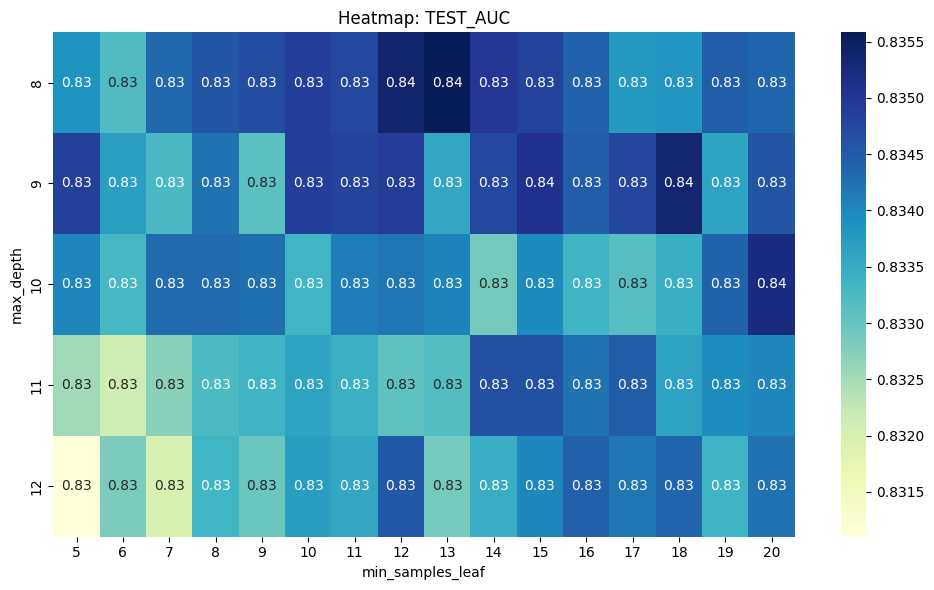

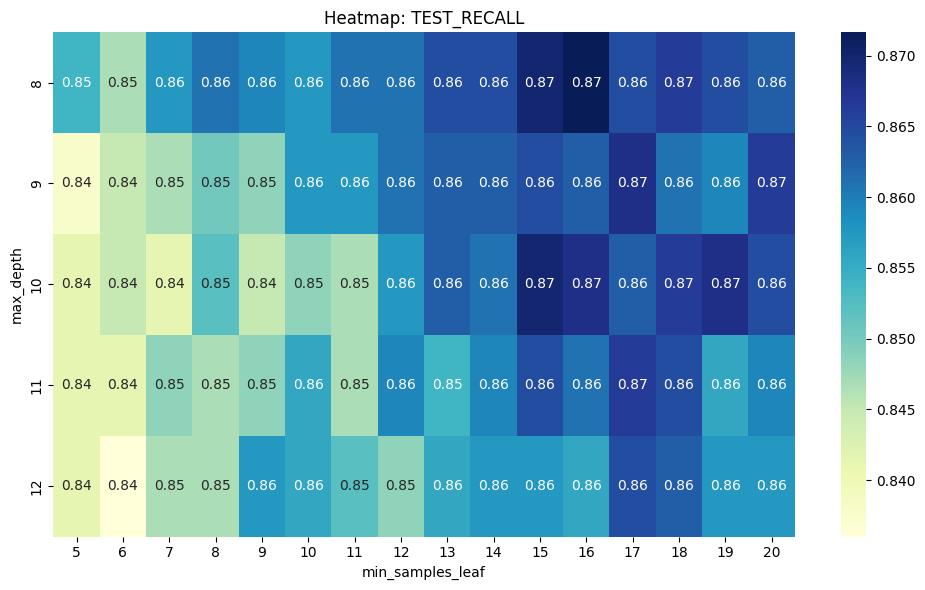

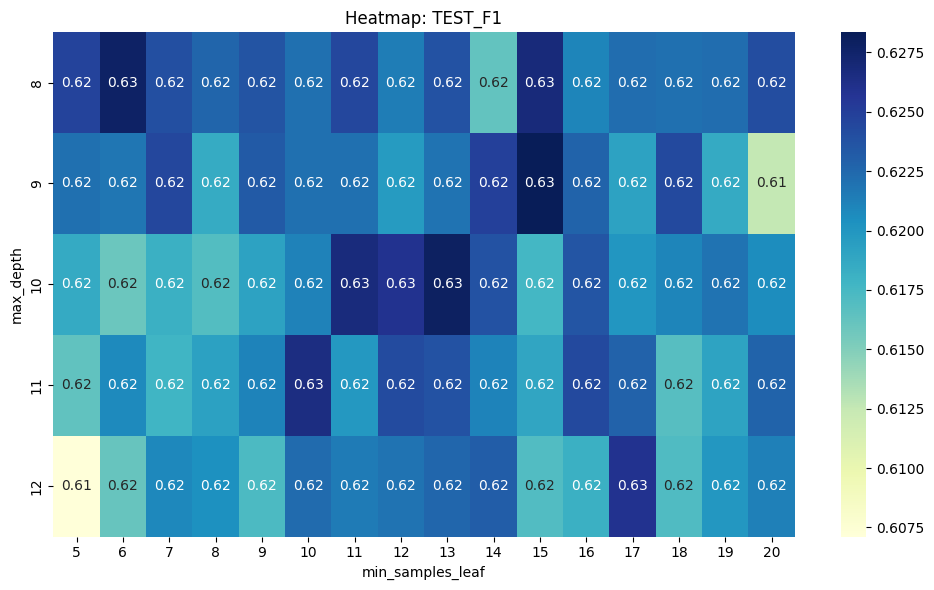

In [119]:
mejor_rf, resumen_rf = buscar_mejor_modelo_con_balanceo_RF(X, y)

In [120]:
mejor_rf, resumen_rf


({'modelo': 'RandomForest',
  'tecnica_balanceo': 'SMOTETomek',
  'hiperparametros': {'max_depth': 10, 'min_samples_leaf': 13},
  'metricas': {'test_auc': 0.8352726399838286,
   'test_f1': 0.6279245283018868,
   'test_recall': 0.7415329768270945,
   'test_precision': 0.5445026178010471,
   'test_accuracy': 0.7666824420255561}},
 {'SMOTE': {'modelo': 'RandomForest',
   'tecnica_balanceo': 'SMOTE',
   'hiperparametros': {'max_depth': 12, 'min_samples_leaf': 11},
   'metricas': {'test_auc': 0.8335728035356598,
    'test_f1': 0.627420604182804,
    'test_recall': 0.7219251336898396,
    'test_precision': 0.5547945205479452,
    'test_accuracy': 0.7723615712257453}},
  'SMOTEENN': {'modelo': 'RandomForest',
   'tecnica_balanceo': 'SMOTEENN',
   'hiperparametros': {'max_depth': 12, 'min_samples_leaf': 9},
   'metricas': {'test_auc': 0.8337726491721336,
    'test_f1': 0.6162716207559257,
    'test_recall': 0.857397504456328,
    'test_precision': 0.481,
    'test_accuracy': 0.7165168007572172

In [139]:
from sklearn.linear_model import LogisticRegression

def buscar_mejor_modelo_lr_auto(X_train_bal, y_train_bal, X_test_scaled, y_test,
                                C_range=[0.01, 0.1, 1, 10],
                                penalties=['l1', 'l2'],
                                mostrar_heatmap=True):
    resultados = []

    for C in C_range:
        for penalty in penalties:
            if penalty == 'l1':
                solver = 'liblinear'
            else:
                solver = 'lbfgs'

            try:
                modelo = LogisticRegression(C=C, penalty=penalty, solver=solver,
                                            max_iter=1000, random_state=42)

                resultado = evaluar_modelo(modelo, X_train_bal, y_train_bal, X_test_scaled, y_test)
                resultado["C"] = C
                resultado["penalty"] = penalty
                resultados.append(resultado)

            except Exception as e:
                print(f"Error con C={C}, penalty={penalty}: {e}")

    df = pd.DataFrame(resultados)

    metricas = ["test_auc", "test_f1", "test_recall", "test_precision", "test_accuracy"]
    df_norm = (df[metricas] - df[metricas].min()) / (df[metricas].max() - df[metricas].min())
    df["ranking_promedio"] = df_norm.mean(axis=1)

    mejor_idx = df["ranking_promedio"].idxmax()
    mejor_modelo = df.loc[mejor_idx].to_dict()

    if mostrar_heatmap:
        pivot = df.pivot(index="C", columns="penalty", values="test_auc")
        sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
        plt.title("Heatmap: AUC por C y penalty (Logistic Regression)")
        plt.xlabel("penalty")
        plt.ylabel("C")
        plt.tight_layout()
        plt.show()

    return df, mejor_modelo


def buscar_mejor_modelo_con_balanceo_LogisticRegression(X, y,
                                                        C_range=[0.01, 0.1, 1, 10],
                                                        penalties=['l1', 'l2'],
                                                        mostrar_heatmap=True):
    tecnicas_balanceo = {
        "SMOTE": SMOTE(random_state=42),
        "SMOTEENN": SMOTEENN(random_state=42),
        "SMOTETomek": SMOTETomek(random_state=42)
    }

    mejores_por_tecnica = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for nombre_tecnica, balanceador in tecnicas_balanceo.items():
        X_train_bal, y_train_bal = balanceador.fit_resample(X_train_scaled, y_train)
        df_resultados, mejor_modelo = buscar_mejor_modelo_lr_auto(
            X_train_bal, y_train_bal, X_test_scaled, y_test,
            C_range=C_range,
            penalties=penalties,
            mostrar_heatmap=mostrar_heatmap
        )
        resumen = {
            "modelo": "LogisticRegression",
            "tecnica_balanceo": nombre_tecnica,
            "hiperparametros": {
                "C": float(mejor_modelo["C"]),
                "penalty": mejor_modelo["penalty"]
            },
            "metricas": {k: float(mejor_modelo[k]) for k in mejor_modelo if k.startswith("test_")}
        }
        mejores_por_tecnica[nombre_tecnica] = resumen

    mejor_modelo_global = max(mejores_por_tecnica.values(), key=lambda m: m["metricas"]["test_auc"])
    # return mejor_modelo_global, mejores_por_tecnica
    return {
        "model": "LogisticRegression",
        "resultado": mejor_modelo_global
    }


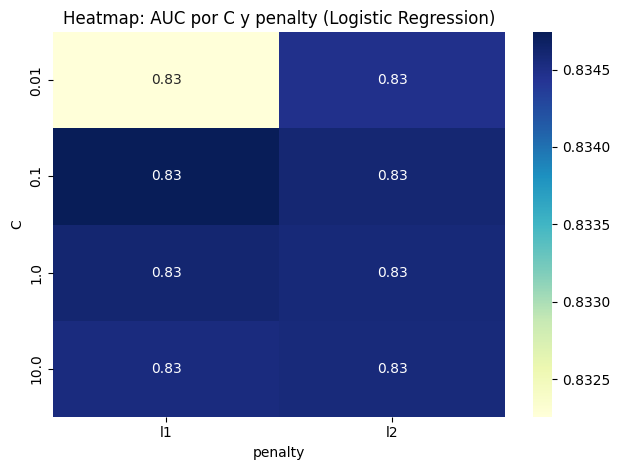

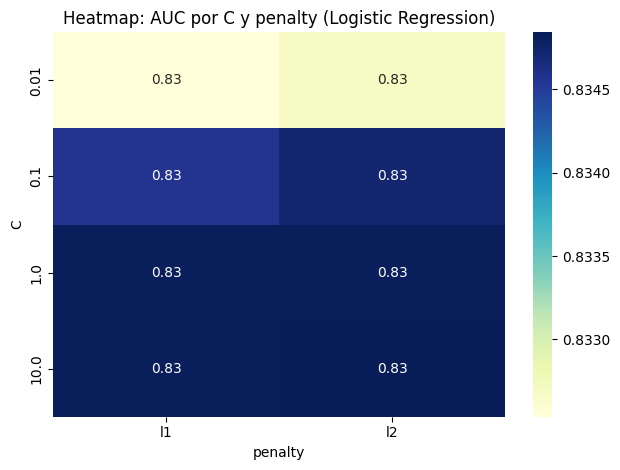

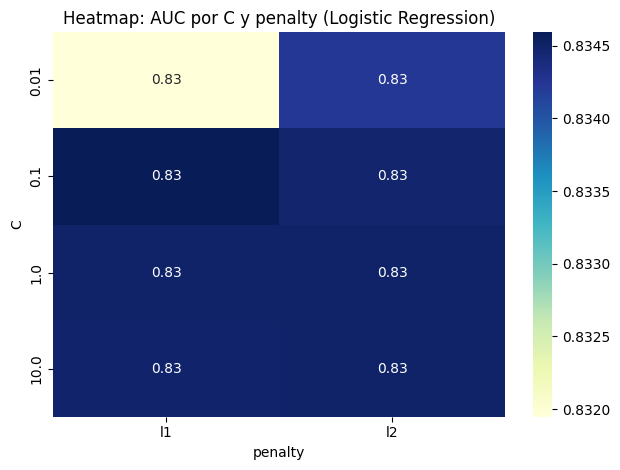

In [122]:
mejor_lr, resumen_lr = buscar_mejor_modelo_con_balanceo_LogisticRegression(X, y)


In [123]:
mejor_lr, resumen_lr

({'modelo': 'LogisticRegression',
  'tecnica_balanceo': 'SMOTEENN',
  'hiperparametros': {'C': 1.0, 'penalty': 'l1'},
  'metricas': {'test_auc': 0.834825858647114,
   'test_f1': 0.6046221111805122,
   'test_recall': 0.8627450980392157,
   'test_precision': 0.4653846153846154,
   'test_accuracy': 0.7004259346900142}},
 {'SMOTE': {'modelo': 'LogisticRegression',
   'tecnica_balanceo': 'SMOTE',
   'hiperparametros': {'C': 0.1, 'penalty': 'l1'},
   'metricas': {'test_auc': 0.8347408668247055,
    'test_f1': 0.6212765957446809,
    'test_recall': 0.7807486631016043,
    'test_precision': 0.5159010600706714,
    'test_accuracy': 0.747278750591576}},
  'SMOTEENN': {'modelo': 'LogisticRegression',
   'tecnica_balanceo': 'SMOTEENN',
   'hiperparametros': {'C': 1.0, 'penalty': 'l1'},
   'metricas': {'test_auc': 0.834825858647114,
    'test_f1': 0.6046221111805122,
    'test_recall': 0.8627450980392157,
    'test_precision': 0.4653846153846154,
    'test_accuracy': 0.7004259346900142}},
  'SMOTET

In [124]:
def comparar_mejores_modelos(modelo_rf, modelo_lr, imprimir=True):
    """
    Compara dos modelos (RandomForest vs LogisticRegression) según sus métricas de test.

    Retorna un dict con el mejor modelo y un resumen comparativo.
    """
    metricas = ["test_auc", "test_f1", "test_accuracy", "test_recall", "test_precision"]

    rf_metricas = modelo_rf["metricas"]
    lr_metricas = modelo_lr["metricas"]

    resumen = {
        "RandomForest": {k: rf_metricas[k] for k in metricas},
        "LogisticRegression": {k: lr_metricas[k] for k in metricas}
    }

    # Calcular score promedio por modelo
    resumen["RandomForest"]["score_promedio"] = sum(resumen["RandomForest"].values()) / len(metricas)
    resumen["LogisticRegression"]["score_promedio"] = sum(resumen["LogisticRegression"].values()) / len(metricas)

    mejor_modelo = "RandomForest" if resumen["RandomForest"]["score_promedio"] > resumen["LogisticRegression"]["score_promedio"] else "LogisticRegression"

    if imprimir:
        print("\n🎯 Comparación Final de Modelos:")
        print("-------------------------------")
        for modelo, valores in resumen.items():
            print(f"\nModelo: {modelo}")
            for metrica, valor in valores.items():
                print(f"  {metrica}: {valor:.4f}")
        print("\n✅ Modelo Ganador:", mejor_modelo)

    return {
        "modelo_ganador": mejor_modelo,
        "resumen_comparacion": resumen
    }


In [126]:
veredicto_final = comparar_mejores_modelos(mejor_rf, mejor_lr)


🎯 Comparación Final de Modelos:
-------------------------------

Modelo: RandomForest
  test_auc: 0.8353
  test_f1: 0.6279
  test_accuracy: 0.7667
  test_recall: 0.7415
  test_precision: 0.5445
  score_promedio: 0.7032

Modelo: LogisticRegression
  test_auc: 0.8348
  test_f1: 0.6046
  test_accuracy: 0.7004
  test_recall: 0.8627
  test_precision: 0.4654
  score_promedio: 0.6936

✅ Modelo Ganador: RandomForest


In [127]:
import matplotlib.pyplot as plt
import numpy as np

def comparar_mejores_modelos(modelo_rf, modelo_lr, imprimir=True, mostrar_grafico=True):
    metricas = ["test_auc", "test_f1", "test_accuracy", "test_recall", "test_precision"]

    rf_metricas = modelo_rf["metricas"]
    lr_metricas = modelo_lr["metricas"]

    resumen = {
        "RandomForest": {k: rf_metricas[k] for k in metricas},
        "LogisticRegression": {k: lr_metricas[k] for k in metricas}
    }

    resumen["RandomForest"]["score_promedio"] = sum(resumen["RandomForest"].values()) / len(metricas)
    resumen["LogisticRegression"]["score_promedio"] = sum(resumen["LogisticRegression"].values()) / len(metricas)

    mejor_modelo = "RandomForest" if resumen["RandomForest"]["score_promedio"] > resumen["LogisticRegression"]["score_promedio"] else "LogisticRegression"

    if imprimir:
        print("\n🎯 Comparación Final de Modelos:")
        print("-------------------------------")
        for modelo, valores in resumen.items():
            print(f"\nModelo: {modelo}")
            for metrica, valor in valores.items():
                print(f"  {metrica}: {valor:.4f}")
        print("\n✅ Modelo Ganador:", mejor_modelo)

        # Explicación textual
        diferencias = {}
        for m in metricas:
            dif = resumen["RandomForest"][m] - resumen["LogisticRegression"][m]
            diferencias[m] = dif

        mayores_dif = sorted(diferencias.items(), key=lambda x: abs(x[1]), reverse=True)
        top_dif = mayores_dif[0]

        print(f"\n📌 Razón principal: El modelo {mejor_modelo} sobresale especialmente en '{top_dif[0]}' con una diferencia de {abs(top_dif[1]):.4f}")

    if mostrar_grafico:
        labels = metricas
        rf_scores = [resumen["RandomForest"][m] for m in labels]
        lr_scores = [resumen["LogisticRegression"][m] for m in labels]

        x = np.arange(len(labels))
        width = 0.35

        plt.figure(figsize=(10, 5))
        plt.bar(x - width/2, rf_scores, width, label='RandomForest')
        plt.bar(x + width/2, lr_scores, width, label='LogisticRegression')

        plt.ylabel('Puntaje')
        plt.title('Comparación de Modelos por Métricas')
        plt.xticks(x, labels)
        plt.ylim(0, 1)
        plt.legend()
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()

    return {
        "modelo_ganador": mejor_modelo,
        "resumen_comparacion": resumen,
        "explicacion_principal": {
            "metrica": top_dif[0],
            "diferencia": top_dif[1]
        }
    }



🎯 Comparación Final de Modelos:
-------------------------------

Modelo: RandomForest
  test_auc: 0.8353
  test_f1: 0.6279
  test_accuracy: 0.7667
  test_recall: 0.7415
  test_precision: 0.5445
  score_promedio: 0.7032

Modelo: LogisticRegression
  test_auc: 0.8348
  test_f1: 0.6046
  test_accuracy: 0.7004
  test_recall: 0.8627
  test_precision: 0.4654
  score_promedio: 0.6936

✅ Modelo Ganador: RandomForest

📌 Razón principal: El modelo RandomForest sobresale especialmente en 'test_recall' con una diferencia de 0.1212


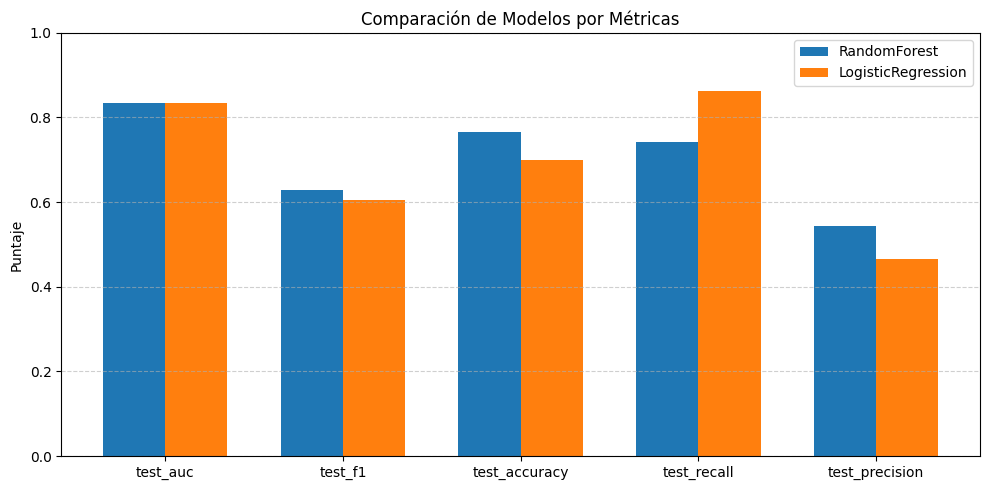

{'modelo_ganador': 'RandomForest',
 'resumen_comparacion': {'RandomForest': {'test_auc': 0.8352726399838286,
   'test_f1': 0.6279245283018868,
   'test_accuracy': 0.7666824420255561,
   'test_recall': 0.7415329768270945,
   'test_precision': 0.5445026178010471,
   'score_promedio': 0.7031830409878828},
  'LogisticRegression': {'test_auc': 0.834825858647114,
   'test_f1': 0.6046221111805122,
   'test_accuracy': 0.7004259346900142,
   'test_recall': 0.8627450980392157,
   'test_precision': 0.4653846153846154,
   'score_promedio': 0.6936007235882944}},
 'explicacion_principal': {'metrica': 'test_recall',
  'diferencia': -0.12121212121212122}}

In [128]:
comparar_mejores_modelos(mejor_rf, mejor_lr)

In [129]:
import matplotlib.pyplot as plt
import numpy as np

def comparar_mejores_modelos(modelo_rf, modelo_lr, imprimir=True, mostrar_grafico=True):
    metricas = ["test_auc", "test_f1", "test_accuracy", "test_recall", "test_precision"]

    rf_metricas = modelo_rf["metricas"]
    lr_metricas = modelo_lr["metricas"]

    resumen = {
        "RandomForest": {k: rf_metricas[k] for k in metricas},
        "LogisticRegression": {k: lr_metricas[k] for k in metricas}
    }

    # Puntaje promedio
    resumen["RandomForest"]["score_promedio"] = sum(resumen["RandomForest"].values()) / len(metricas)
    resumen["LogisticRegression"]["score_promedio"] = sum(resumen["LogisticRegression"].values()) / len(metricas)

    mejor_modelo = "RandomForest" if resumen["RandomForest"]["score_promedio"] > resumen["LogisticRegression"]["score_promedio"] else "LogisticRegression"

    # Diferencias por métrica
    diferencias = {
        m: resumen["RandomForest"][m] - resumen["LogisticRegression"][m] for m in metricas
    }

    mayores_dif = sorted(diferencias.items(), key=lambda x: abs(x[1]), reverse=True)
    metrica_clave, diferencia = mayores_dif[0]

    if imprimir:
        print("\n🎯 Comparación Final de Modelos:")
        print("-------------------------------")
        for modelo, valores in resumen.items():
            print(f"\nModelo: {modelo}")
            for metrica, valor in valores.items():
                print(f"  {metrica}: {valor:.4f}")
        print("\n✅ Modelo Ganador:", mejor_modelo)

        # Explicación inteligente
        explicacion = f"\n📌 *Motivo principal:*\n"
        if metrica_clave == "test_recall":
            explicacion += (
                f"El modelo {mejor_modelo} supera al otro en **recall** (+{diferencia:.2%}), "
                "lo que significa que detecta una mayor proporción de los casos positivos reales.\n"
                "Esto es clave cuando es más grave omitir un positivo que tener un falso positivo.\n"
                "(Ej: detección de fraude, enfermedades, fallas críticas)."
            )
        elif metrica_clave == "test_auc":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mayor **AUC** (+{diferencia:.2%}), "
                "lo que indica una mejor capacidad general para distinguir entre clases positivas y negativas."
            )
        elif metrica_clave == "test_f1":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mejor **F1-score** (+{diferencia:.2%}), "
                "lo que implica un mejor balance entre precisión y recall en la clase positiva."
            )
        elif metrica_clave == "test_precision":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mejor **precisión** (+{diferencia:.2%}), "
                "por lo tanto, comete menos falsos positivos (predice positivos cuando realmente lo son)."
            )
        elif metrica_clave == "test_accuracy":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mayor **accuracy** (+{diferencia:.2%}), "
                "aunque esto puede ser menos relevante si las clases están desbalanceadas."
            )
        else:
            explicacion += (
                f"La diferencia más significativa fue en la métrica '{metrica_clave}' (+{diferencia:.2%})."
            )

        print(explicacion)

    if mostrar_grafico:
        labels = metricas
        rf_scores = [resumen["RandomForest"][m] for m in labels]
        lr_scores = [resumen["LogisticRegression"][m] for m in labels]

        x = np.arange(len(labels))
        width = 0.35

        plt.figure(figsize=(10, 5))
        plt.bar(x - width/2, rf_scores, width, label='RandomForest')
        plt.bar(x + width/2, lr_scores, width, label='LogisticRegression')

        plt.ylabel('Puntaje')
        plt.title('Comparación de Métricas - RF vs LR')
        plt.xticks(x, labels)
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    return {
        "modelo_ganador": mejor_modelo,
        "resumen_comparacion": resumen,
        "explicacion_principal": {
            "metrica": metrica_clave,
            "diferencia": diferencia
        }
    }



🎯 Comparación Final de Modelos:
-------------------------------

Modelo: RandomForest
  test_auc: 0.8353
  test_f1: 0.6279
  test_accuracy: 0.7667
  test_recall: 0.7415
  test_precision: 0.5445
  score_promedio: 0.7032

Modelo: LogisticRegression
  test_auc: 0.8348
  test_f1: 0.6046
  test_accuracy: 0.7004
  test_recall: 0.8627
  test_precision: 0.4654
  score_promedio: 0.6936

✅ Modelo Ganador: RandomForest

📌 *Motivo principal:*
El modelo RandomForest supera al otro en **recall** (+-12.12%), lo que significa que detecta una mayor proporción de los casos positivos reales.
Esto es clave cuando es más grave omitir un positivo que tener un falso positivo.
(Ej: detección de fraude, enfermedades, fallas críticas).


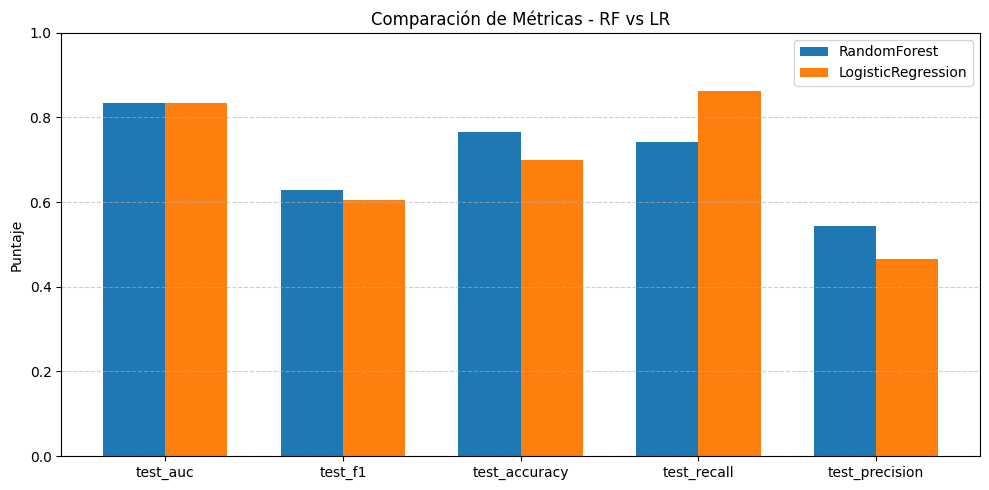

{'modelo_ganador': 'RandomForest',
 'resumen_comparacion': {'RandomForest': {'test_auc': 0.8352726399838286,
   'test_f1': 0.6279245283018868,
   'test_accuracy': 0.7666824420255561,
   'test_recall': 0.7415329768270945,
   'test_precision': 0.5445026178010471,
   'score_promedio': 0.7031830409878828},
  'LogisticRegression': {'test_auc': 0.834825858647114,
   'test_f1': 0.6046221111805122,
   'test_accuracy': 0.7004259346900142,
   'test_recall': 0.8627450980392157,
   'test_precision': 0.4653846153846154,
   'score_promedio': 0.6936007235882944}},
 'explicacion_principal': {'metrica': 'test_recall',
  'diferencia': -0.12121212121212122}}

In [130]:
comparar_mejores_modelos(mejor_rf, mejor_lr)

In [134]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
import numpy as np

def buscar_mejor_modelo_con_balanceo_XGBoost(X, y, random_state=42):
    balanceadores = {
        "SMOTE": SMOTE(random_state=random_state),
        "SMOTEENN": SMOTEENN(random_state=random_state),
        "SMOTETomek": SMOTETomek(random_state=random_state)
    }

    hiperparametros = {
        "max_depth": [4, 6, 8],
        "learning_rate": [0.01, 0.1, 0.3],
        "n_estimators": [100, 200]
    }

    mejor_modelo = None
    mejor_auc = 0
    resultados = []

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=random_state
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for nombre_balanceador, balanceador in balanceadores.items():
        X_bal, y_bal = balanceador.fit_resample(X_train_scaled, y_train)

        for md in hiperparametros["max_depth"]:
            for lr in hiperparametros["learning_rate"]:
                for ne in hiperparametros["n_estimators"]:
                    xgb = XGBClassifier(
                        # deprecado => use_label_encoder=False,
                        eval_metric='logloss',
                        random_state=random_state,
                        max_depth=md,
                        learning_rate=lr,
                        n_estimators=ne
                    )
                    xgb.fit(X_bal, y_bal)

                    # Predicciones
                    y_train_proba = xgb.predict_proba(X_bal)[:, 1]
                    y_test_proba = xgb.predict_proba(X_test_scaled)[:, 1]
                    y_test_pred = xgb.predict(X_test_scaled)

                    # Métricas en test
                    test_auc = roc_auc_score(y_test, y_test_proba)
                    test_f1 = f1_score(y_test, y_test_pred)
                    test_acc = accuracy_score(y_test, y_test_pred)
                    test_rec = recall_score(y_test, y_test_pred)
                    test_pre = precision_score(y_test, y_test_pred)

                    if test_auc > mejor_auc:
                        mejor_auc = test_auc
                        mejor_modelo = {
                            "modelo": xgb,
                            "balanceo": nombre_balanceador,
                            "hiperparametros": {
                                "max_depth": md,
                                "learning_rate": lr,
                                "n_estimators": ne
                            },
                            "metricas": {
                                "test_auc": test_auc,
                                "test_f1": test_f1,
                                "test_accuracy": test_acc,
                                "test_recall": test_rec,
                                "test_precision": test_pre
                            }
                        }

                    resultados.append({
                        "balanceo": nombre_balanceador,
                        "max_depth": md,
                        "learning_rate": lr,
                        "n_estimators": ne,
                        "test_auc": test_auc,
                        "test_f1": test_f1,
                        "test_accuracy": test_acc,
                        "test_recall": test_rec,
                        "test_precision": test_pre
                    })

    # return mejor_modelo, resultados
    return {
        "model": "XGBoost",
        "resultado": mejor_modelo
    }


In [135]:
mejor_xgb = buscar_mejor_modelo_con_balanceo_XGBoost(X, y)

In [136]:
mejor_xgb

{'model': 'XGBoost',
 'resultado': {'modelo': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, feature_weights=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=4, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, ...),
  'balanceo': 'SMOTETomek',
  'hiperparametros': {'max_depth': 4,
   'learning_rate': 0.1,
   'n_estimators': 100},
  'metricas': {'test_auc': np.float64(0.

In [138]:
dic_mejores_modelos = []

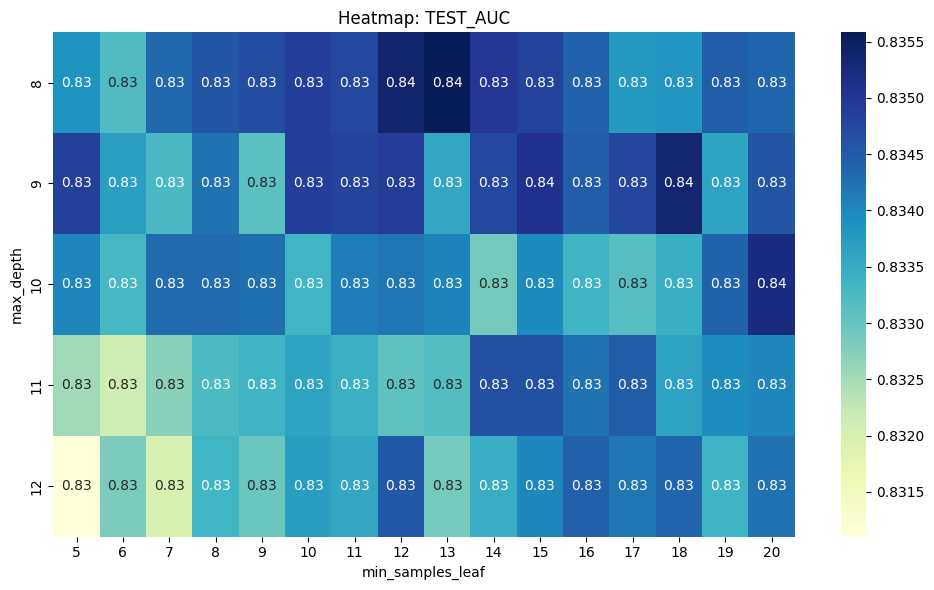

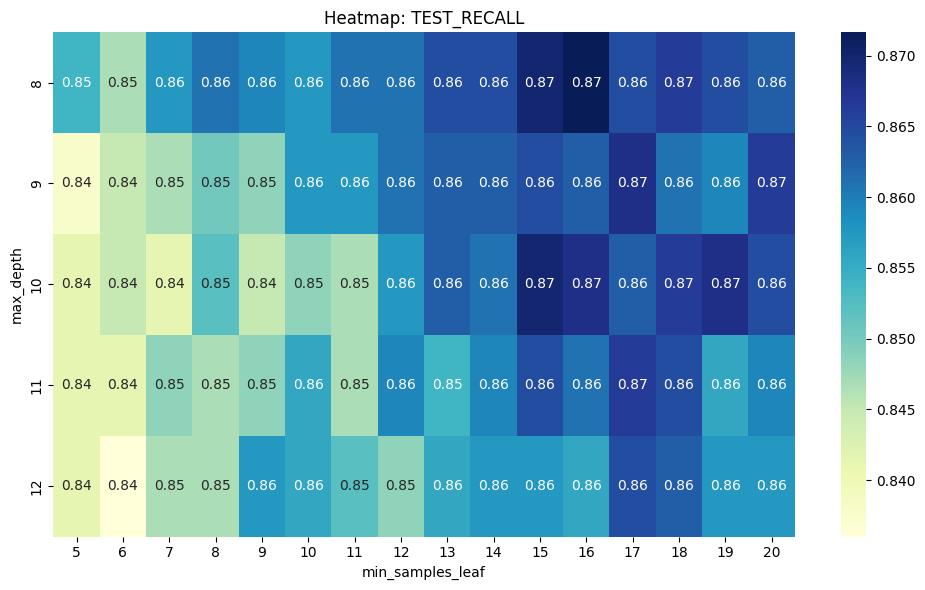

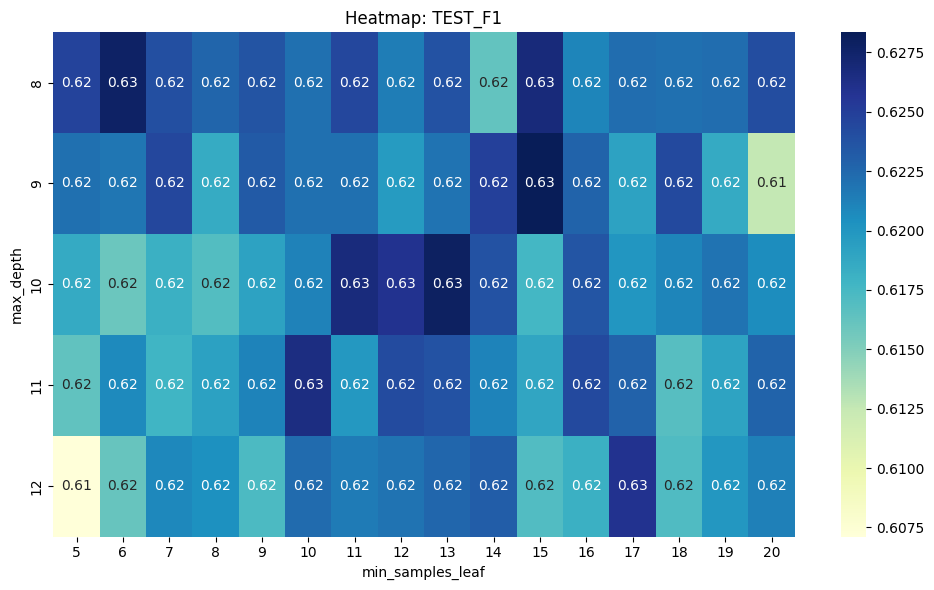

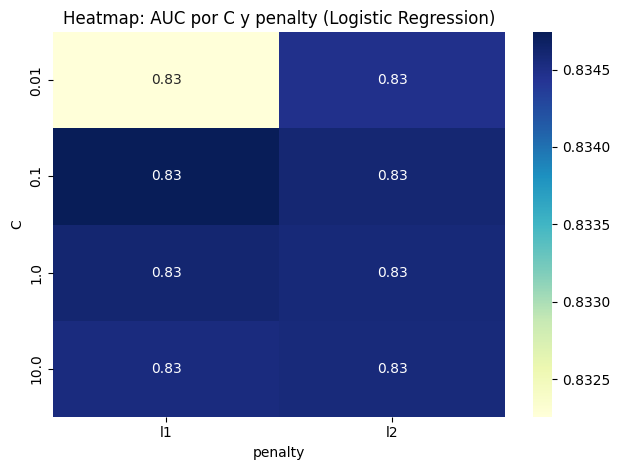

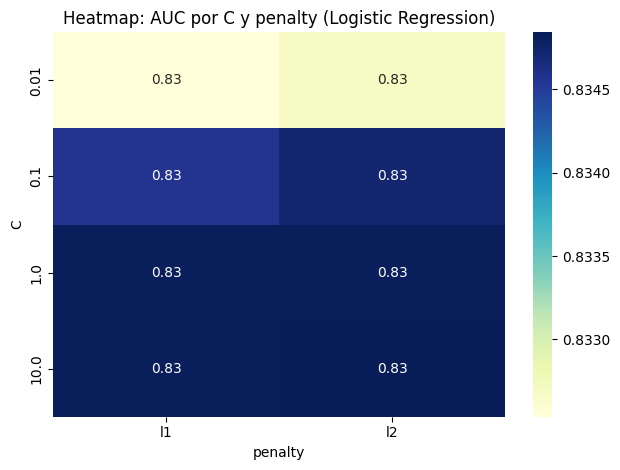

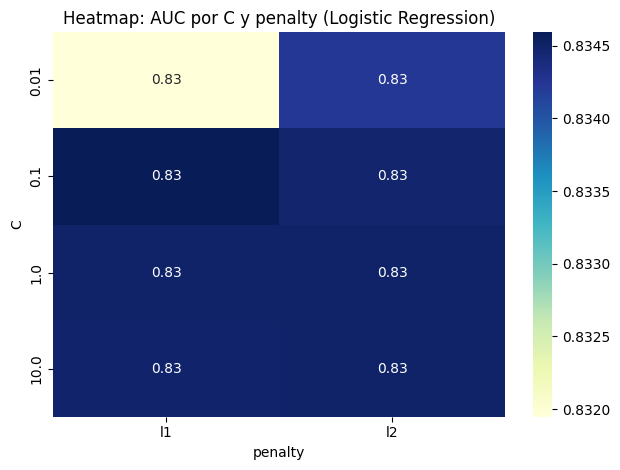

In [141]:
# Suponiendo que X,y ya definidos
mejor_xgb = buscar_mejor_modelo_con_balanceo_XGBoost(X, y)
dic_mejores_modelos.append(mejor_xgb)

mejor_rf = buscar_mejor_modelo_con_balanceo_RF(X, y)
dic_mejores_modelos.append(mejor_rf)

mejor_logreg = buscar_mejor_modelo_con_balanceo_LogisticRegression(X, y)
dic_mejores_modelos.append(mejor_logreg)

In [148]:
dic_mejores_modelos


[{'model': 'XGBoost',
  'resultado': {'modelo': XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric='logloss',
                 feature_types=None, feature_weights=None, gamma=None,
                 grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=0.1, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=4, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 multi_strategy=None, n_estimators=100, n_jobs=None,
                 num_parallel_tree=None, ...),
   'balanceo': 'SMOTETomek',
   'hiperparametros': {'max_depth': 4,
    'learning_rate': 0.1,
    'n_estimators': 100},
   'metricas': {'test_a

In [146]:
import matplotlib.pyplot as plt

def comparar_mejores_modelos(mejores_modelos, imprimir=True, mostrar_grafico=True):
    """
    Compara varios modelos (lista de dicts con 'model' y 'resultado' con métricas).
    Imprime un resumen y opcionalmente muestra un gráfico comparativo.
    También entrega una explicación del motivo principal de la elección del mejor modelo.
    """
    if not mejores_modelos:
        print("No hay modelos para comparar.")
        return None

    # Extraemos métricas relevantes y nombre de modelo
    resumen = []
    for entrada in mejores_modelos:
        modelo = entrada["model"]
        res = entrada["resultado"]["metricas"]
        resumen.append({
            "Modelo": modelo,
            "AUC": res.get("test_auc", 0),
            "F1": res.get("test_f1", 0),
            "Accuracy": res.get("test_accuracy", 0),
            "Recall": res.get("test_recall", 0),
            "Precision": res.get("test_precision", 0),
        })

    # Ordenamos por AUC descendente (puedes cambiar criterio aquí)
    resumen = sorted(resumen, key=lambda x: x["AUC"], reverse=True)

    if imprimir:
        print("Comparativa de mejores modelos:")
        for r in resumen:
            print(
                f"{r['Modelo']}: AUC={r['AUC']:.4f}, F1={r['F1']:.4f}, "
                f"Accuracy={r['Accuracy']:.4f}, Recall={r['Recall']:.4f}, Precision={r['Precision']:.4f}"
            )

    if mostrar_grafico:
        modelos = [r["Modelo"] for r in resumen]
        aucs = [r["AUC"] for r in resumen]
        f1s = [r["F1"] for r in resumen]
        recalls = [r["Recall"] for r in resumen]
        precisions = [r["Precision"] for r in resumen]

        x = range(len(modelos))
        plt.figure(figsize=(10,6))
        plt.plot(x, aucs, marker='o', label="AUC")
        plt.plot(x, f1s, marker='s', label="F1-score")
        plt.plot(x, recalls, marker='^', label="Recall")
        plt.plot(x, precisions, marker='d', label="Precisión")
        plt.xticks(x, modelos)
        plt.title("Comparación de métricas entre mejores modelos")
        plt.ylabel("Score")
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True)
        plt.show()

    # Si hay al menos 2 modelos, generamos explicación comparativa entre los 2 primeros
    if len(resumen) >= 2:
        mejor = resumen[0]
        segundo = resumen[1]

        # Buscamos la métrica con mayor diferencia relativa
        metricas_clave = ["Recall", "AUC", "F1", "Accuracy", "Precision"]
        mejor_metrica = None
        mayor_dif = 0
        for met in metricas_clave:
            diff = mejor[met] - segundo[met]
            if diff > mayor_dif:
                mayor_dif = diff
                mejor_metrica = met

        mejor_modelo = mejor["Modelo"]
        diferencia = mayor_dif

        explicacion = f"📌 *Motivo principal:* "
        if mejor_metrica == "Recall":
            explicacion += (
                f"El modelo {mejor_modelo} supera al segundo mejor en **recall** (+{diferencia:.2%}), "
                "lo que significa que detecta una mayor proporción de los casos positivos reales.\n"
                "Esto es clave cuando es más grave omitir un positivo que tener un falso positivo.\n"
                "(Ej: detección de fraude, enfermedades, fallas críticas)."
            )
        elif mejor_metrica == "AUC":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mayor **AUC** (+{diferencia:.2%}), "
                "lo que indica una mejor capacidad general para distinguir entre clases positivas y negativas."
            )
        elif mejor_metrica == "F1":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mejor **F1-score** (+{diferencia:.2%}), "
                "equilibrando precisión y recall para un buen rendimiento general."
            )
        elif mejor_metrica == "Accuracy":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mayor **accuracy** (+{diferencia:.2%}), "
                "lo que indica mejor desempeño global, aunque en datasets desbalanceados puede ser engañoso."
            )
        elif mejor_metrica == "Precision":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mejor **precisión** (+{diferencia:.2%}), "
                "lo que significa menos falsos positivos, importante para reducir alertas falsas."
            )
        else:
            explicacion += f"El modelo {mejor_modelo} muestra mejor desempeño general."

        if imprimir:
            print(explicacion)

    else:
        explicacion = ""

    # Devuelve el mejor modelo y la explicación
    return {"mejor_modelo": resumen[0], "explicacion": explicacion}


Comparativa de mejores modelos:
XGBoost: AUC=0.8369, F1=0.6153, Accuracy=0.7733, Recall=0.6827, Precision=0.5599
RandomForest: AUC=0.8353, F1=0.6279, Accuracy=0.7667, Recall=0.7415, Precision=0.5445
LogisticRegression: AUC=0.8348, F1=0.6046, Accuracy=0.7004, Recall=0.8627, Precision=0.4654


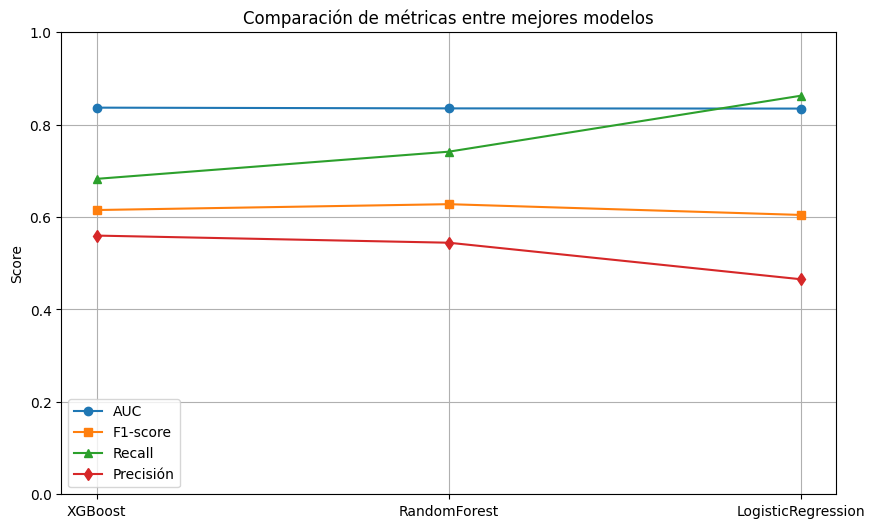

📌 *Motivo principal:* El modelo XGBoost tiene mejor **precisión** (+1.54%), lo que significa menos falsos positivos, importante para reducir alertas falsas.


{'mejor_modelo': {'Modelo': 'XGBoost',
  'AUC': np.float64(0.8368633653086351),
  'F1': 0.6152610441767068,
  'Accuracy': 0.7733080927591103,
  'Recall': 0.6827094474153298,
  'Precision': 0.5599415204678363},
 'explicacion': '📌 *Motivo principal:* El modelo XGBoost tiene mejor **precisión** (+1.54%), lo que significa menos falsos positivos, importante para reducir alertas falsas.'}

In [147]:
comparar_mejores_modelos(dic_mejores_modelos)

Conclusión: El modelo XGBoost tiene la mejor precisión (55.99%), lo que implica menos falsos positivos y puede reducir el número de alertas falsas, útil en contextos donde estas son costosas.
Por otro lado, RandomForest destaca en recall (74.15%) y F1-score (62.79%), indicando que detecta mejor los casos positivos, aunque a costa de más falsas alarmas.
La elección del modelo depende de si se prioriza minimizar falsas alarmas o no perder casos positivos.

**Regresión Logística**

#Encoding

In [52]:
columnas_categoricas = df.select_dtypes(include=['object']).columns
print(columnas_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [53]:
df_2 = pd.get_dummies(df,drop_first=True)

In [54]:
df_2.columns

Index(['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total', 'Churn_Yes',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_No internet service',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'ac

In [55]:
df_2

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,9.0,2.20,65.60,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0.0,9.0,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,4.0,2.34,73.90,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1.0,13.0,3.17,98.00,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1.0,3.0,2.97,83.90,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,13.0,1.90,55.15,742.90,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
7039,0.0,22.0,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0.0,2.0,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0.0,67.0,2.30,67.85,4627.65,False,True,True,True,True,...,False,False,False,True,False,True,False,False,False,True


In [56]:
df_encoded = pd.get_dummies(df, columns=["Gender"])

print(df_encoded)

KeyError: "None of [Index(['Gender'], dtype='object')] are in the [columns]"

In [ ]:
df_encoded.columns

#Verificación de la Proporción de Cancelación (Churn)

In [ ]:
df['Churn'].value_counts()


In [ ]:
df_encoded['Gender_Female'].value_counts()

In [ ]:
df_encoded['Gender_Male'].value_counts()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
columnas = df.columns

In [ ]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['Gender']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [ ]:
X = one_hot.fit_transform(df)

In [ ]:
df_gender_actualizado=pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

In [ ]:
df_gender_actualizado.columns

# Normalización o Estandarización

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(df_gender_actualizado)

ValueError: could not convert string to float: 'No'

## 🎯 Correlación y Selección de Variables ##

#Análisis de Correlación#

In [ ]:
corr = df.corr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr,2),vmax=1,vmin=1,center=0,
               square=True,linewindths=.5,annot=True,cbar_Kwags={'shrink':.5})
plt.show()